In [1]:
import API_keys

## Create tools

For this example, you will make an agent to do web research with a search engine, and one agent to create plots. Define the tools they'll use below:

### Search tool

In [2]:
from langchain_community.tools.tavily_search import TavilySearchResults
from langchain_core.tools import tool
from langchain_experimental.tools import PythonREPLTool

tavily_tool = TavilySearchResults(max_results=5)

# This executes code locally, which can be unsafe
python_repl_tool = PythonREPLTool()

In [2]:
from langchain_community.vectorstores import Chroma
from langchain_openai import OpenAIEmbeddings
embedding=OpenAIEmbeddings(chunk_size=1)
from methods import *


# Load book_info database
BookInfo =  DATABASE(db_path='book_info', embedding=embedding, parent_path="book_parents")
# Load robot_info database
# RobotInfo =  DATABASE(db_path='robot_info', embedding=embedding)

In [4]:
# Load data to database
BookInfo.insert_document('book_infos.json', jq_schema="book_infos")
# RobotInfo.insert_document('robot_info.txt')

In [5]:
BookInfo.retriever.get_relevant_documents("cuốn sách tôi muốn tìm nói về cờ bạc")

[Document(page_content="{'Tên sách': 'Cờ bạc - người không chơi là người không thắng', 'Loại sách': 'Giáo trình', 'ID': '41', 'Tác giả': 'Nguyễn Huỳnh Lâm Vũ', 'Nhà xuất bản': 'Đại học Quốc gia Tp. Hồ Chí Minh', 'Năm xuất bản': '2022', 'Vị trí': 'kệ số 1'}", metadata={'source': 'book_infos.json'}),
 Document(page_content="{'Tên sách': 'Các kĩ thuật diễn xuất trong Poker', 'Loại sách': 'Giáo trình', 'ID': '34', 'Tác giả': 'Nguyễn Huỳnh Lâm Vũ', 'Nhà xuất bản': 'Đại học Quốc gia Tp. Hồ Chí Minh', 'Năm xuất bản': '2024', 'Vị trí': 'kệ số 2'}", metadata={'source': 'book_infos.json'}),
 Document(page_content="{'Tên sách': 'Sách dạy nấu ăn cho người mới bắt đầu', 'Loại sách': 'Giáo trình', 'ID': '37', 'Tác giả': 'Hồ Văn Đằng', 'Nhà xuất bản': 'Đại học Quốc gia Tp. Hồ Chí Minh', 'Năm xuất bản': '2022', 'Vị trí': 'kệ số 4'}", metadata={'source': 'book_infos.json'}),
 Document(page_content="{'Tên sách': 'Giáo trình Bida - từ cơ bản đến nâng cao', 'Loại sách': 'Giáo trình', 'ID': '35', 'Tác giả'

In [ ]:
BookInfo.db.as_retriever().get_relevent_documents()

In [ ]:
from langchain.tools.retriever import create_retriever_tool


# book_retriever = BookInfo.db.as_retriever(
#     search_type="similarity_score_threshold", search_kwargs={"score_threshold": 0.2, "k": 4}
# )

book_retriever = retriever_test

book_search_tool = create_retriever_tool(
    book_retriever,
    "book_researcher",
    "tìm kiếm và trả lời các thông tin về sách trong database của thư viện cho người dùng",
)

robot_retriever = RobotInfo.db.as_retriever()
robot_search_tool = create_retriever_tool(
    robot_retriever,
    "robot_researcher",
    "trả lời các thông tin về chính bạn",
)

In [ ]:
book_retriever.get_relevant_documents('sách của tác giả Hồ Văn Đằng')

[]

In [ ]:
BookInfo.len_db

0

In [ ]:
import cv2
from langchain.agents import Tool
from pyzbar.pyzbar import decode
import time

# define a video capture object 
def scan_barcode(ten_sach: str):
    t = time.time()
    # image_path = '384543478_1440448783351821_8320517275639987477_n.jpg'  # Replace 'images' with the path to your directory
    # image = cv2.imread(image_path)
    cap = cv2.VideoCapture(0)
    if not cap.isOpened():
        return "Không có camera để quét barcode"
    while True:
        # Capture frame-by-frame
        ret, image = cap.read()
        cv2.imshow('image', image)
        if cv2.waitKey(1) == ord('q'):
            cap.release()
            cv2.destroyAllWindows()
            break
        
        if (time.time() - t) > 20:
            return "Xin lỗi, tôi chưa quét được mã vạch"
        try:
            # Convert the image to grayscale
            gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

            # Detect barcodes in the image
            decoded_objects = decode(gray)


            # Process each detected barcode and cut it into a new image
            for i, obj in enumerate(decoded_objects):
                data = obj.data.decode('utf-8')  # Extract the barcode data
                cap.release()
                cv2.destroyAllWindows()
                return data
        except:
            continue
        
# scan_barcode_tool = [
#     Tool(
#         name="Scan_barcode",
#         func=scan_barcode,
#         description="Bạn có thể quét mã vạch của sách, thẻ sinh viên,... và trả về mã vạch (ID) quét được. Bạn cần yêu cầu người dùng đưa sách hoặc thẻ sinh viên vào để  thực hiện quét",
#     )
# ]

In [11]:
import sqlite3
import setting

conn = sqlite3.connect(setting.database_name)
cursor = conn.cursor()

# Create a table for books if it doesn't exist

# Search for the index by name
cursor.execute("SELECT * FROM books WHERE id = ?", ('4',))
result = cursor.fetchone()

# Close the connection
conn.close()

In [1]:
from book_search import *
book_name = search_book_by_id_in_bookitem('20134011')[1]
print(book_name)
print(search_book_by_name_in_books(book_name)[-2])


/home/xuanai/Python-env/LLM2/lib/python3.10/site-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


202 thành ngữ Tiếng Anh giao tiếp thông dụng
iVBORw0KGgoAAAANSUhEUgAAAWwAAAIPCAYAAABXF+TQAAAACXBIWXMAAA7DAAAOwwHHb6hkAAAgAElEQVR4nMy9abMdx3nn+culqs569wW492IHAYIASZAURcmiJMttWW5LIXd0jHuWNzMRM59gPky/6ZiImZieNaJjxiHFtMeWZZnWyn1fQBAg9gvci7ueraoy85kXWXXuuSDpZVq2WREH5+KcrKrMJ5/8P/9nyToq+7c/k6zZRHRCIQqvLKITgjKIAEqBCIrqJRw6RCmUgIJD34kCmfgb4v8Pna545BBQDlQAsSAJSjQ6KBQBhQPl8doTtIDWoE28QdAQBBMCJihEUoQEZxxYB6oE7UAChNheB4sSS8AgykwMIsSXBBIfSIMQ0HhlEKUJaIJSiJLYXkvssxbQIZ4ugIfEaRJfta1Grw5GG1+VrHR1e4kdicOqGtefe60JSoOp7lvdx3gw4tEERtZB4g4uHjTWG5QYSq3BKMadFAUYEF33YEIGLs4HASTeywjooNESX0rlKHJEKTwWUXo8x0Y8WgJU4wtK4yoZSiUBLR6Dh5CBZEBAdAH4CX2zCHGevDLxXBWiTkgtT42gory0PKJbE5onn/PZZw5BSaj6rxExUUbVvCgJKPx43oJSeF23qcYePElwiAoEJYiKY1EyOc9MyObw/+sh1Oc4IzgbQCl0acjcwb1y6wmJP1iA8re0QUGwEDSJh6RaDl7FuTVxuvAKvIbCSBxWEJTEccTOaZBKb6SSpdR6IwdKW40p6pWq9E1XSh9fWkCJQlQAJZV8w0F/qnMEjdPgagES0CIYCWhRCAYRS9BhYr0JWsAEFe+BgWr9hkrVFYKRiB0KoTBCYb9IN/55D/uPcdG/bajq79PmQNaHjIGuPlaixgDy6EtNnBOkUrKx5WCsJErUwXUVBAE5tIjrC1b4DogSQtVKVQoqSDxZU19

In [7]:
search_all_by_bookID_in_Bill('20134011')

(1, 20134011, 20134011, '2024-01-01 22:08:21.847403', None)

In [5]:
search_studentinfo_by_id('20134011')

(1,
 '20134011',
 'Phạm Xuân Ái',
 4,
 'Cơ khí chế tạo máy',
 'Robot và trí tuệ nhân tạo',
 '/9j/4AAQSkZJRgABAQAAAQABAAD/4gIoSUNDX1BST0ZJTEUAAQEAAAIYAAAAAAIQAABtbnRyUkdCIFhZWiAAAAAAAAAAAAAAAABhY3NwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAQAA9tYAAQAAAADTLQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAlkZXNjAAAA8AAAAHRyWFlaAAABZAAAABRnWFlaAAABeAAAABRiWFlaAAABjAAAABRyVFJDAAABoAAAAChnVFJDAAABoAAAAChiVFJDAAABoAAAACh3dHB0AAAByAAAABRjcHJ0AAAB3AAAADxtbHVjAAAAAAAAAAEAAAAMZW5VUwAAAFgAAAAcAHMAUgBHAEIAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAFhZWiAAAAAAAABvogAAOPUAAAOQWFlaIAAAAAAAAGKZAAC3hQAAGNpYWVogAAAAAAAAJKAAAA+EAAC2z3BhcmEAAAAAAAQAAAACZmYAAPKnAAANWQAAE9AAAApbAAAAAAAAAABYWVogAAAAAAAA9tYAAQAAAADTLW1sdWMAAAAAAAAAAQAAAAxlblVTAAAAIAAAABwARwBvAG8AZwBsAGUAIABJAG4AYwAuACAAMgAwADEANv/bAEMAAwICAwICAwMDAwQDAwQFCAUFBAQFCgcHBggMCgwMCwoLCw0OEhANDhEOCwsQFhARExQVFRUMDxcYFhQYEhQVFP/bAEMBAwQEBQQFCQUFCRQNCw0UFBQUFBQUFBQUFBQUFBQUFBQ

In [ ]:
from book_search import *
import time
from datetime import datetime

def borrow_book(name_book: str):
    result = {}
    print("Xin hãy đưa sách vào khe bên dưới.")
    Book_ID = scan_barcode('')
    result['Sách'] = str(search_book_by_id_in_bookitem(Book_ID))
    time.sleep(1)
    
    print("Xin hãy đưa thẻ sinh viên vào khe bên dưới.")
    Student_ID = scan_barcode('')
    result['Sinh viên'] = str(list(search_studentinfo_by_id(Student_ID))[:-1])
    
    return str(result)

borrow_book_tool = [
    Tool(
        name="Borrow_book",
        func=borrow_book,
        description="Hữu ích trong việc giúp người dùng mượn sách",
    )
]


def confirm_borrow_completely(n: str):
    # print("Đã xử lí xong mượn sách !!!")
    response = input()
    return response
    
confirm_borrow_conpletely_tool = [
    Tool(
        name="Confirm_borrow",
        func=confirm_borrow_completely,
        description="Hữu ích trong việc phản hồi lại xác nhận mượn sách của người dùng",
    )
]



def return_book(name_book: str):
    result = {}
    print("Xin hãy đưa sách vào khe bên dưới.")
    Book_ID = scan_barcode('')
    Student_ID = search_studentID_by_boookID_in_Bill(Book_ID)
    if Student_ID is None:
        return "Xin lỗi, có vẻ như cuốn sách này chưa được mượn ở thư viện hoặc bạn đã trả nó trước đó rồi."
    
    result['Sách'] = str(search_book_by_id_in_bookitem(Book_ID))
    result['Sinh viên'] = str(list(search_studentinfo_by_id(Student_ID))[:-1])
    
    return str(result)

return_book_tool = [
    Tool(
        name="Return_book",
        func=return_book,
        description="Hữu ích trong việc giúp người dùng trả sách",
    )
]

# def confirm_return_completely(n: str):
#     # print("Đã xử lí xong mượn sách !!!")
#     response = input()
#     return response
    
# confirm_return_conpletely_tool = [
#     Tool(
#         name="Confirm_return",
#         func=confirm_return_completely,
#         description="Hữu ích trong việc phản hồi lại xác nhận trả sách của người dùng",
#     )
# ]

def confirm_return_completely(n: str):
    # print("Đã xử lí xong mượn sách !!!")
    response = input()
    return response
    
confirm_return_conpletely_tool = [
    Tool(
        name="Confirm_return",
        func=confirm_return_completely,
        description="Hữu ích trong việc phân loại ý định người dùng",
    )
]

def process_return(intent: str):
    print('////////////////////////////////', intent)
    if "affirm" in intent:
        update_bill_return('1', datetime.now())
        return "Đã xử lí xong trả sách!!!"
    return "Quá trình trả sách chưa được thực hiện."
    
process_return_tool = [
    Tool(
        name="Process_return",
        func=process_return,
        description="Hữu ích trong việc xử lí thông tin dưới cơ sở dữ liệu để hoàn thành quá trình mượn sách của người dùng. Đàu vào intent của bạn nên là ý định affirm hoặc deny của người dùng.",
    )
]


/home/xuanai/Python-env/LLM2/lib/python3.10/site-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


## Helper Utilites

Define a helper function below, which make it easier to add new agent worker nodes.

In [ ]:
from langchain.agents import AgentExecutor, create_openai_tools_agent
from langchain_core.messages import BaseMessage, HumanMessage, AIMessage
from langchain_openai import ChatOpenAI
from langchain_core.prompts import ChatPromptTemplate, MessagesPlaceholder


def create_agent(llm: ChatOpenAI, tools: list, system_prompt: str):
    # Each worker node will be given a name and some tools.
    prompt = ChatPromptTemplate.from_messages(
        [
            (
                "system",
                system_prompt,
            ),
            MessagesPlaceholder(variable_name="messages"),
            MessagesPlaceholder(variable_name="agent_scratchpad"),
        ]
    )
    agent = create_openai_tools_agent(llm, tools, prompt)
    executor = AgentExecutor(agent=agent, tools=tools)
    return executor

We can also define a function that we will use to be the nodes in the graph - it takes care of converting the agent response to a human message. This is important because that is how we will add it the global state of the graph

In [ ]:
def agent_node(state, agent, name):
    print('......STATE......: ', state)
    result = agent.invoke(state)
    return {"messages": [HumanMessage(content=result["output"], name=name)]}

### Create Agent Supervisor

It will use function calling to choose the next worker node OR finish processing.

In [ ]:
from langchain.output_parsers.openai_functions import JsonOutputFunctionsParser

members = ["Researcher", "Book_researcher", "Borrow_book", "Return_book", "Coder"]
system_prompt = (
    "Bạn là một robot thông minh phục vụ trong thư viện HCMUTE, bạn tên là Librarios. Bạn là một robot di động có 2 bánh xe giúp bạn có thể đi lại tự do trong thư viện, "
    "nhờ đó bạn có thể dẫn người dùng đến nơi để những cuốn sách mà sinh viên hay giảng viên mong muốn."
    "Để làm tốt việc của mình, bạn được cấp quyền như là một người quan sát quản lí cuộc hội thoại giữa các workers sau:   {members}. "
    "Nhưng đừng lạm dụng các worker, hãy cố gắng trả lời câu hỏi trước, nếu không được thì mới nhờ tới những worker. Cho những yêu cầu người dùng sau, "
    "phản hồi cho worker nên làm gì tiếp theo. Mỗi worker sẽ thực hiện một nhiệm vụ và phản hội kết quả và trạng thái của họ. Khi kết thúc, phản hồi FINISH."
    # "You are a supervisor tasked with managing a conversation between the"
    # " following workers:  {members}. Given the following user request,"
    # " respond with the worker to act next. Each worker will perform a"
    # " task and respond with their results and status. When finished,"
    # " respond with FINISH."
    # " the history converstaion between you and human in below: "
)
# Our team supervisor is an LLM node. It just picks the next agent to process
# and decides when the work is completed
options = ["Assistant"] + members
# Using openai function calling can make output parsing easier for us
function_def = {
    "name": "route",
    "description": "Select the next role.",
    "parameters": {
        "title": "routeSchema",
        "type": "object",
        "properties": {
            "next": {
                "title": "Next",
                "anyOf": [
                    {"enum": options},
                ],
            }
        },
        "required": ["next"],
    },
}
prompt = ChatPromptTemplate.from_messages(
    [
        ("system", system_prompt),
        # MessagesPlaceholder(variable_name="history"),
        MessagesPlaceholder(variable_name="messages"),
        (
            "system",
            "Cho đoạn hội thoại trên, worker nào nên được gọi tiếp theo?"
            " Hay ta nên gọi Assistant? chọn một trong: {options}",
        ),
    ]
).partial(options=str(options), members=", ".join(members))

llm = ChatOpenAI(model="gpt-3.5-turbo-0125")
# llm = ChatOpenAI(model="gpt-4-1106-preview")

supervisor_chain = (
    prompt
    | llm.bind_functions(functions=[function_def], function_call="route")
    | JsonOutputFunctionsParser()
)

In [ ]:
function_def = {
    "name": "route",
    "description": "Phân loại câu hỏi của người dùng thành affirm hoặc deny",
    "parameters": {
        "title": "routeSchema",
        "type": "object",
        "properties": {
            "messages": {
                "title": "messages",
                "ouput": 'text',
                "anyOf": [
                    {"enum": ['affirm', 'deny']},
                ],
            }
        },
        "required": ["messages"],
    },
}
system_prompt = (
    "Bạn có khả năng nhận ra ý định của người dùng."
)

prompt = ChatPromptTemplate.from_messages(
    [
        ("system", system_prompt),
        # MessagesPlaceholder(variable_name="history"),
        MessagesPlaceholder(variable_name="messages"),
    ]
)

classify_chain = (
    prompt
    | llm.bind_functions(functions=[function_def], function_call="route")
    | JsonOutputFunctionsParser()
)

In [ ]:
classify_chain.invoke({'messages': ['tôi không muốn quét lại']})['messages']

'deny'

In [ ]:
function_def = {
    "name": "route",
    "description": "trả lời câu hỏi của người dùng",
    "parameters": {
        "title": "routeSchema",
        "type": "object",
        "properties": {
            "messages": {
                "title": "messages",
                "ouput": 'text',
            }
        },
        "required": ["messages"],
    },
}
system_assistant_prompt = (
    "Bạn là một trợ lí robot thông minh phục vụ trong thư viện HCMUTE, bạn tên là Librarios. Bạn là một robot di động có 2 bánh xe giúp bạn có thể đi lại tự do trong thư viện, "
    "nhờ đó bạn có thể dẫn người dùng đến nơi để những cuốn sách mà sinh viên hay giảng viên mong muốn."
)

assistant_prompt = ChatPromptTemplate.from_messages(
    [
        ("system", system_assistant_prompt),
        # MessagesPlaceholder(variable_name="history"),
        MessagesPlaceholder(variable_name="messages"),
    ]
)

assistant_chain = (
    assistant_prompt
    | llm.bind_functions(functions=[function_def], function_call="route")
    | JsonOutputFunctionsParser()
)

In [ ]:
assistant_chain.invoke([HumanMessage('xin chào, bạn tên là gì?')])

{'messages': ['Xin chào! Tôi là Librarios, trợ lí robot thông minh phục vụ trong thư viện HCMUTE. Mình có thể giúp gì cho bạn hôm nay?']}

## Construct Graph

We're ready to start building the graph. Below, define the state and worker nodes using the function we just defined.

In [ ]:
def chain_node(state, chain, name):
    global OpenAIHistoryConversation
    print('///////////', state)
    if state["messages"][-1].content==OpenAIHistoryConversation[-1].content:
        result = chain.invoke(state)
        return {"messages": [HumanMessage(content=result['messages'][0], name=name)]}
    else:
        return state

### PROMPT

In [ ]:
BORROW_BOOK_PROMPT = """Hữu ích cho việc giúp người dùng xử lý quá trình mượn sách.
                        Example Input:
                        'Sách': [(20134015, 'Hướng dẫn trở thành một Inventerer chuyên nghiệp', 'true')],
                        'Sinh viên': [1, '20134011', 'Phạm Xuân Ái', 4, 'Cơ khí chế tạo máy', 'Robot và trí tuệ nhân tạo']
                        Example Output:
                        ** Thông tin sách **
                        - Tên sách: 202 thành ngữ Tiếng Anh giao tiếp thông dụng
                        - Mã sách: 20134015
                        ** Thông tin sinh viên **
                        - Tên sinh viên: Phạm Xuân Ái
                        - MSSV: 20134011
                        - Ngành: Robot và trí tuệ nhân tạo
                        - Khoa: Cơ khí chế tạo máy
                        >>> Bạn xác nhận lại thông tin trên giúp mình để mình hoàn thành việc mượn sách"""
                        
RETURN_BOOK_PROMPT = """Hữu ích cho việc giúp người dùng xử lý quá trình trả sách.
                        Example Input:
                        'Sách': [(20134015, 'Hướng dẫn trở thành một Inventerer chuyên nghiệp', 'true')],
                        'Sinh viên': [1, '20134011', 'Phạm Xuân Ái', 4, 'Cơ khí chế tạo máy', 'Robot và trí tuệ nhân tạo']
                        Example Output:
                        ** Thông tin sách **
                        - Tên sách: 202 thành ngữ Tiếng Anh giao tiếp thông dụng
                        - Mã sách: 20134015
                        ** Thông tin sinh viên **
                        - Tên sinh viên: Phạm Xuân Ái
                        - MSSV: 20134011
                        - Ngành: Robot và trí tuệ nhân tạo
                        - Khoa: Cơ khí chế tạo máy
                        >>> Bạn xác nhận lại thông tin trên giúp mình để mình hoàn thành việc trả sách"""
    
# CONFIRM_RETURN_PROMPT = """Bạn sẽ nhận được phản hồi từ người dùng. Nếu phản hồi là những từ xác nhận có như: có, vâng, đúng rồi,... 
#     thì xác nhận lại với người dùng là họ đã trả sách thành công, còn ngược lại thì thông báo cho người dùng rằng quá trình trả sách chưa hoàn tất"""

CONFIRM_RETURN_PROMPT = """Bạn hữu ích trong việc phân loại ý định người dùng.
                    Hãy phân loại ý định thành affirm hoặc deny dựa trên 2 ví dụ sau:
                    ** Ví dụ 1:
                        - Input: có | dạ đúng rồi | vâng ạ | chính là cuốn sách đó | đúng rồi ạ ...
                        - Output: (Intent: affirm)
                    ** Ví dụ 2:
                        - Input: không | không phải | dạ không | đó không phải cuốn sách tôi muốn trả | không phải đâu ạ ...
                        - Output: (Intent: deny)"""

In [ ]:
import operator
from typing import Annotated, Any, Dict, List, Optional, Sequence, TypedDict
import functools

from langchain_core.prompts import ChatPromptTemplate, MessagesPlaceholder
from langgraph.graph import StateGraph, END


# The agent state is the input to each node in the graph
class AgentState(TypedDict):
    # The annotation tells the graph that new messages will always
    # be added to the current states
    # history : list[BaseMessage]
    messages: Annotated[Sequence[BaseMessage], operator.add]
    # The 'next' field indicates where to route to next
    next: str


research_agent = create_agent(llm, [tavily_tool], "Hữu ích cho việc tra cứu các thông tin trên web")
research_node = functools.partial(agent_node, agent=research_agent, name="Researcher")

book_research_agent = create_agent(llm, [book_search_tool], "Bạn hữu ích cho việc trả lời các thông tin liên quan đến sách trong cơ sở dữ liệu của thư viện. Ví dụ, ban có thể tra cứu thông tin sách dựa trên mã vạch (ID), tên sách, tên tác giả, ...")
book_research_node = functools.partial(agent_node, agent=book_research_agent, name="Book_researcher")

# robot_research_agent = create_agent(llm, [robot_search_tool], "Bạn hữu ích cho việc trả lời các thông tin về chính bạn")
# robot_research_node = functools.partial(agent_node, agent=robot_research_agent, name="Robot_researcher")

# scan_barcode_agent = create_agent(llm, scan_barcode_tool, "Hữu ích cho việc quét mã vạch của sách, thẻ sinh viên,... và trả về mã vạch (ID) quét được")
# scan_barcode_node = functools.partial(agent_node, agent=scan_barcode_agent, name="Scan_barcode"


borrow_book_agent = create_agent(llm, borrow_book_tool, BORROW_BOOK_PROMPT)
borrow_book_node = functools.partial(agent_node, agent=borrow_book_agent, name="Borrow_book")

confirm_borrow_agent = create_agent(llm, confirm_borrow_conpletely_tool, "Bạn sẽ nhận được phản hồi từ người dùng. Nếu phản hồi là những từ xác nhận có như: có, vâng, đúng rồi,... thì xác nhận lại với người dùng là họ đã mượn sách thành công, còn ngược lại thì thông báo cho người dùng rằng quá trình mượn sách chưa hoàn tất")
confirm_borrow_node = functools.partial(agent_node, agent=confirm_borrow_agent, name="Confirm_borrow")

return_book_agent = create_agent(llm, return_book_tool, RETURN_BOOK_PROMPT)
return_book_node = functools.partial(agent_node, agent=return_book_agent, name="Return_book")

confirm_return_agent = create_agent(llm, confirm_return_conpletely_tool, CONFIRM_RETURN_PROMPT)
confirm_return_node = functools.partial(agent_node, agent=confirm_return_agent, name="Confirm_return")

process_return_agent = create_agent(llm, process_return_tool, "Bạn hữu ích trong việc xử lí dưới cơ sở dữ liệu của thư viện để hoàn thành quá trinh trả sách")
process_return_node = functools.partial(agent_node, agent=process_return_agent, name="Process_return")


assistant_node = functools.partial(chain_node, chain=assistant_chain, name="Assistant")

# NOTE: THIS PERFORMS ARBITRARY CODE EXECUTION. PROCEED WITH CAUTION
code_agent = create_agent(
    llm,
    [python_repl_tool],
    "Bạn có thể tạo ra các đoạn code python an toàn để phân tích và tạo ra các đồ thị sử dụng thư viện matplotlib.",
)
code_node = functools.partial(agent_node, agent=code_agent, name="Coder")

workflow = StateGraph(AgentState)
workflow.add_node("Book_researcher", book_research_node)
# workflow.add_node("Robot_researcher", robot_research_node)
workflow.add_node("Researcher", research_node)
# workflow.add_node("Scan_barcode", scan_barcode_node)
workflow.add_node("Borrow_book", borrow_book_node)
workflow.add_node("Confirm_borrow", confirm_borrow_node)
workflow.add_node("Return_book", return_book_node)
workflow.add_node("Confirm_return", confirm_return_node)
workflow.add_node("Process_return", process_return_node)
workflow.add_node("Coder", code_node)
workflow.add_node("supervisor", supervisor_chain)
workflow.add_node("Assistant", assistant_node)

In [ ]:
# mess = {'Scan_barcode': {'messages': [HumanMessage(content='Cuốn sách có mã vạch 20134011 được tìm thấy trong cơ sở dữ liệu của thư viện.', name='Scan_barcode')]}}
# assistant_chain.invoke(mess['Scan_barcode'])['messages'][0]

In [ ]:
workflow.branches

defaultdict(list, {})

Now connect all the edges in the graph.

In [ ]:
for member in members:
    # We want our workers to ALWAYS "report back" to the supervisor when done
    if member != "Borrow_book" and member != "Return_book":
        workflow.add_edge(member, "supervisor")
# workflow.add_edge(member, "supervisor")
# The supervisor populates the "next" field in the graph state
# which routes to a node or finishes
conditional_map = {k: k for k in members}
conditional_map["Assistant"] = "Assistant"
# conditional_map["FINISH"] = END
workflow.add_conditional_edges("supervisor", lambda x: x["next"], conditional_map)
# conditional_map["Assistant"] = END
workflow.add_edge("Assistant", END)
workflow.add_edge("Borrow_book", "Confirm_borrow")
workflow.add_edge("Confirm_borrow", END)
workflow.add_edge("Return_book", "Confirm_return")
workflow.add_edge("Confirm_return", "Process_return")
workflow.add_edge("Process_return", END)
# workflow.add_conditional_edges("Assistant", lambda x: x["next"], {'Finish': END})
# Finally, add entrypoint
workflow.set_entry_point("supervisor")

graph = workflow.compile()

In [ ]:
conditional_map

{'Researcher': 'Researcher',
 'Book_researcher': 'Book_researcher',
 'Borrow_book': 'Borrow_book',
 'Return_book': 'Return_book',
 'Coder': 'Coder',
 'Assistant': 'Assistant'}

In [ ]:
graph.get_graph()

Graph(nodes={'__start__': Node(id='__start__', data=<class 'pydantic.v1.main.LangGraphInput'>), '__end__': Node(id='__end__', data=<class 'pydantic.v1.main.LangGraphOutput'>), 'Book_researcher': Node(id='Book_researcher', data=RunnableLambda(...)), 'Researcher': Node(id='Researcher', data=RunnableLambda(...)), 'Borrow_book': Node(id='Borrow_book', data=RunnableLambda(...)), 'Confirm_borrow': Node(id='Confirm_borrow', data=RunnableLambda(...)), 'Return_book': Node(id='Return_book', data=RunnableLambda(...)), 'Confirm_return': Node(id='Confirm_return', data=RunnableLambda(...)), 'Process_return': Node(id='Process_return', data=RunnableLambda(...)), 'Coder': Node(id='Coder', data=RunnableLambda(...)), 'supervisor': Node(id='supervisor', data=ChatPromptTemplate(input_variables=['messages'], input_types={'messages': typing.List[typing.Union[langchain_core.messages.ai.AIMessage, langchain_core.messages.human.HumanMessage, langchain_core.messages.chat.ChatMessage, langchain_core.messages.syst

## Invoke the team

With the graph created, we can now invoke it and see how it performs!

In [ ]:
OpenAIHistoryConversation = []
query = None
answer = None
while True:
    print("_________You: ", end ='')
    user_input = input()
    print(user_input)
    if user_input=='quit' or user_input=='exit':
        break
    
    print('............. Generating .............', end='\r')
    print("________Bot: ")
    
    query = HumanMessage(user_input)
    OpenAIHistoryConversation.append(query)
    inputs = {
        # "history" : [],
        "messages": OpenAIHistoryConversation
    }
    
    for s in graph.stream(inputs):
        if "__end__" not in s:
            print(s)
            print('------------------------')
        else:
            print(s)
            try:
                answer = AIMessage(s.get('__end__')['messages'][-1].content)
                print(answer)
            except:
                pass
    # OpenAIHistoryConversation.append(query)
    OpenAIHistoryConversation.append(answer)

_________You: 

xin chào
________Bot:  Generating .............
{'supervisor': {'next': 'Assistant'}}
------------------------
/////////// {'messages': [HumanMessage(content='xin chào')], 'next': 'Assistant'}
{'Assistant': {'messages': [HumanMessage(content='Xin chào! Librarios ở đây để giúp bạn. Bạn cần hỗ trợ gì hôm nay?', name='Assistant')]}}
------------------------
{'__end__': {'messages': [HumanMessage(content='xin chào'), HumanMessage(content='Xin chào! Librarios ở đây để giúp bạn. Bạn cần hỗ trợ gì hôm nay?', name='Assistant')], 'next': 'Assistant'}}
content='Xin chào! Librarios ở đây để giúp bạn. Bạn cần hỗ trợ gì hôm nay?'
_________You: quit


In [ ]:
inputs = {"messages": [HumanMessage(content="chào bạn mình là Ái")]}
async for output in graph.astream_log(inputs, include_types=["llm"]):
    # astream_log() yields the requested logs (here LLMs) in JSONPatch format
    for op in output.ops:
        if op["path"] == "/streamed_output/-":
            # this is the output from .stream()
            ...
        elif op["path"].startswith("/logs/") and op["path"].endswith(
            "/streamed_output/-"
        ):
            # because we chose to only include LLMs, these are LLM tokens
            print(op["value"])

content='' additional_kwargs={'function_call': {'arguments': '', 'name': 'route'}}
content='' additional_kwargs={'function_call': {'arguments': '{"', 'name': ''}}
content='' additional_kwargs={'function_call': {'arguments': 'next', 'name': ''}}
content='' additional_kwargs={'function_call': {'arguments': '":"', 'name': ''}}
content='' additional_kwargs={'function_call': {'arguments': 'Assistant', 'name': ''}}
content='' additional_kwargs={'function_call': {'arguments': '"}', 'name': ''}}
content=''
/////////// {'messages': [HumanMessage(content='chào bạn mình là Ái')], 'next': 'Assistant'}


/home/xuanai/Python-env/LLM2/lib/python3.10/site-packages/pygraphviz/agraph.py:1407: RuntimeWarning: Error: Unknown HTML element <lambda> on line 1 
in label of node supervisor_<lambda>

  warnings.warn(b"".join(errors).decode(self.encoding), RuntimeWarning)


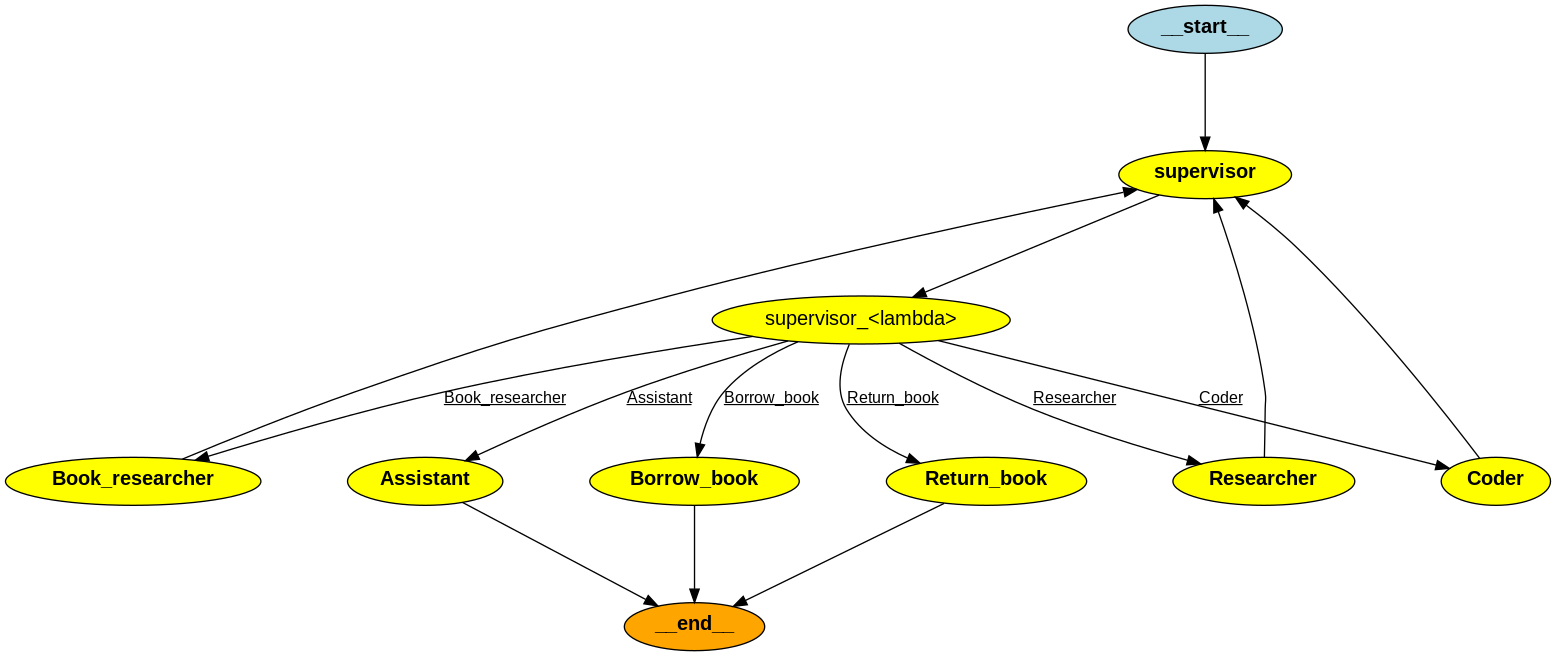

In [ ]:
from IPython.display import Image
Image(graph.get_graph().draw_png())

In [ ]:
### Counting tokens for chat API calls
import tiktoken
def num_tokens_from_messages(messages, model="gpt-3.5-turbo-0613"):
  """Returns the number of tokens used by a list of messages."""
  try:
      encoding = tiktoken.encoding_for_model(model)
  except KeyError:
      encoding = tiktoken.get_encoding("cl100k_base")
  if model == "gpt-3.5-turbo-0613":  # note: future models may deviate from this
      num_tokens = 0
      for message in messages:
          num_tokens += 4  # every message follows <im_start>{role/name}\n{content}<im_end>\n
          for key, value in message.items():
              num_tokens += len(encoding.encode(value))
              if key == "name":  # if there's a name, the role is omitted
                  num_tokens += -1  # role is always required and always 1 token
      num_tokens += 2  # every reply is primed with <im_start>assistant
      return num_tokens
  else:
      raise NotImplementedError(f"""num_tokens_from_messages() is not presently implemented for model {model}.
  See https://github.com/openai/openai-python/blob/main/chatml.md for information on how messages are converted to tokens.""")

messages=[
    {"role": "system", "content": "You are a helpful assistant."},
    {"role": "user", "content": "Who won the world series in 2020?"},
    {"role": "assistant", "content": "The Los Angeles Dodgers won the World Series in 2020."},
    {"role": "user", "content": "Where was it played?"}
  ]
num_tokens_from_messages(messages)

In [ ]:
# Speech to text
import pyaudio
import wave

def record_audio(file_path, duration=5, sample_rate=16000, chunk=1024, format=pyaudio.paInt16, channels=1):
    # os.system("pyaudio.PyAudio() 2>/dev/null")
    audio = pyaudio.PyAudio()
    stream = audio.open(format=format, channels=channels,
                        rate=sample_rate, input=True,
                        frames_per_buffer=chunk)

    print("..... Recording .....", end='\r')
    frames = []

    for i in range(0, int(sample_rate / chunk * duration)):
        data = stream.read(chunk)
        frames.append(data)

    print(" " * 50, end="\r", flush=True)

    stream.stop_stream()
    stream.close()
    audio.terminate()

    with wave.open(file_path, 'wb') as wf:
        wf.setnchannels(channels)
        wf.setsampwidth(audio.get_sample_size(format))
        wf.setframerate(sample_rate)
        wf.writeframes(b''.join(frames))
      

In [ ]:
record_audio(file_path="audio.mp3")

ALSA lib pcm_dmix.c:1089:(snd_pcm_dmix_open) unable to open slave
ALSA lib pcm_oss.c:377:(_snd_pcm_oss_open) Unknown field port
ALSA lib pcm_oss.c:377:(_snd_pcm_oss_open) Unknown field port
ALSA lib pcm_usb_stream.c:486:(_snd_pcm_usb_stream_open) Invalid type for card
ALSA lib pcm_usb_stream.c:486:(_snd_pcm_usb_stream_open) Invalid type for card
ALSA lib pcm_dmix.c:1089:(snd_pcm_dmix_open) unable to open slave


In [ ]:
from openai import OpenAI
client = OpenAI()

audio_file= open("audio.mp3", "rb")
transcription = client.audio.transcriptions.create(
  model="whisper-1", 
  file=audio_file
)
print(transcription.text)

Sinchao


In [ ]:
OpenAIHistoryConversation

[HumanMessage(content='chào bạn mình là Ái'),
 AIMessage(content='Chào bạn Ái, mình là Librarios - trợ lý robot phục vụ trong thư viện HCMUTE. Cần mình giúp gì hôm nay?'),
 HumanMessage(content='oke tạm biệt'),
 AIMessage(content='Tạm biệt bạn Ái, nếu cần trợ giúp hoặc thông tin gì khác, hãy quay lại đây nhé!')]

In [ ]:
for s in graph.stream({
        "messages": [HumanMessage(content='chào bạn, mình tên là Ái')]
    }):
        if "__end__" not in s:
            print(s)
        else:
            print(s)
            try:
                answer = AIMessage(s.get('__end__')['messages'][-1].content)
                print(answer)
            except:
                pass
    # OpenAIHistoryConversation.append(query)
    # OpenAIHistoryConversation.append(answer)

{'supervisor': {'next': 'Assistant'}}
/////////// {'messages': [HumanMessage(content='chào bạn, mình tên là Ái')], 'next': 'Assistant'}
{'Assistant': {'messages': [HumanMessage(content='chào bạn, mình tên là Ái')], 'next': 'Assistant'}}
{'__end__': {'messages': [HumanMessage(content='chào bạn, mình tên là Ái'), HumanMessage(content='chào bạn, mình tên là Ái')], 'next': 'Assistant'}}
content='chào bạn, mình tên là Ái'


In [ ]:
history_handle  = history_conversation()
response = None
for s in graph.stream(
    {
        "messages": [HumanMessage(content='chào bạn, mình tên là Ái')]
    }
):
    if "__end__" not in s:
        print(s)
        # for key, value in s.items():
        #     if key != 'supervisor':
        #         response = AIMessage((value['messages'][0]).content)
        print("----")
    else:
        print(s)
response

{'supervisor': {'next': 'Assistant'}}
----
/////////// {'messages': [HumanMessage(content='chào bạn, mình tên là Ái')], 'next': 'Assistant'}
{'Assistant': {'messages': [HumanMessage(content='chào bạn, mình tên là Ái')], 'next': 'Assistant'}}
----
{'__end__': {'messages': [HumanMessage(content='chào bạn, mình tên là Ái'), HumanMessage(content='chào bạn, mình tên là Ái')], 'next': 'Assistant'}}


In [ ]:
history_handle  = history_conversation()
for s in graph.stream(
    {
        # "history" : history_handle.base_history,
        "messages": [
            HumanMessage(content="Quét giúp tôi cuốn sách này và tìm vị trí cuốn sách đó trong cơ sở dữ liệu của thư viện từ kết quả được trả về")
        ]
    }
):
    if "__end__" not in s:
        print(s)
        print("----")
        

{'supervisor': {'next': 'Scan_barcode'}}
----
{'Scan_barcode': {'messages': [HumanMessage(content='Cuốn sách có mã vạch 20134011 được tìm thấy trong cơ sở dữ liệu của thư viện.', name='Scan_barcode')]}}
----
{'supervisor': {'next': 'Researcher'}}
----
{'Researcher': {'messages': [HumanMessage(content='Cuốn sách có mã vạch 20134011 không được tìm thấy trong cơ sở dữ liệu của thư viện. Tuy nhiên, kết quả tìm kiếm cho mã vạch này cho thấy các thông tin khác liên quan đến các bất động sản tại Williams, AZ 86046. Bạn có thể tham khảo thông tin chi tiết bằng cách truy cập vào các liên kết sau:\n1. [RE/MAX - Mobile Home for Sale](https://www.remax.com/az/williams/home-details/parcel-20134009-20134011-williams-az-86046/15068759792809465560/M00000040/195302)\n2. [Trulia - Parcel for Sale](https://www.trulia.com/home/Parcel-20134009-20134011-Williams-AZ-86046-2054357900)\n3. [Zillow - Pending Listing](https://www.zillow.com/homedetails/PARCEL-20134009-20134011-Williams-AZ-86046/2054357900_zpid/)

In [ ]:
history_handle  = history_conversation()
while True:
    print("_________You: " ,end='')
    user_input = input()
    if user_input=='quit' or user_input=='exit':
        break
    
    print('............. Generating .............', end='\r')
    print("________Bot: ", end='')
    # inputs = {
    #     "messages": [
    #         HumanMessage(content=user_input)
    #     ],
    #     "history" : history_handle.base_history
    # }
    # for s in graph.stream(inputs):
    #     print(s)
    answer = supervisor_chain.invoke({"messages": [HumanMessage(content=user_input)],"history": history_handle.base_history})
        
    history_handle.add_to_history(HumanMessage(content=user_input))
    history_handle.add_to_history(AIMessage(content=answer["next"]))
    

{'supervisor': {'next': 'Coder'}}
----
......STATE......:  {'messages': [HumanMessage(content='code vẽ con mèo')], 'next': 'Coder'}


Python REPL can execute arbitrary code. Use with caution.


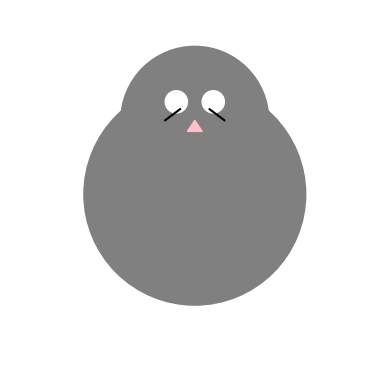

{'Coder': {'messages': [HumanMessage(content='Dưới đây là hình vẽ con mèo sử dụng thư viện matplotlib. Hình vẽ bao gồm cơ thể, đầu, mắt, mũi và ria mép của con mèo. Hãy xem hình vẽ ở cửa sổ pop-up hiển thị.', name='Coder')]}}
----
{'supervisor': {'next': 'Assistant'}}
----
/////////// {'messages': [HumanMessage(content='code vẽ con mèo'), HumanMessage(content='Dưới đây là hình vẽ con mèo sử dụng thư viện matplotlib. Hình vẽ bao gồm cơ thể, đầu, mắt, mũi và ria mép của con mèo. Hãy xem hình vẽ ở cửa sổ pop-up hiển thị.', name='Coder')], 'next': 'Assistant'}
{'Assistant': {'messages': [HumanMessage(content='code vẽ con mèo'), HumanMessage(content='Dưới đây là hình vẽ con mèo sử dụng thư viện matplotlib. Hình vẽ bao gồm cơ thể, đầu, mắt, mũi và ria mép của con mèo. Hãy xem hình vẽ ở cửa sổ pop-up hiển thị.', name='Coder')], 'next': 'Assistant'}}
----


In [ ]:
for s in graph.stream(
    {"messages": [HumanMessage(content="code vẽ con mèo")]},
    {"recursion_limit": 100},
):
    if "__end__" not in s:
        print(s)
        print("----")

In [ ]:
from openai import OpenAI
client = OpenAI()

response = client.chat.completions.create(
  model="gpt-3.5-turbo",
  messages=[
    {"role": "system", "content": "You are a helpful assistant."},
    {"role": "user", "content": "Who won the world series in 2020?"},
    {"role": "assistant", "content": "The Los Angeles Dodgers won the World Series in 2020."},
    {"role": "user", "content": "Where was it played?"}
  ]
)

In [ ]:
response

In [ ]:
from openai import OpenAI

client = OpenAI()

response = client.audio.speech.create(
    model="tts-1",
    voice="nova",
    input="""“Vườn hoa đẹp Tây hồ đã thành bãi hoang”. Đây là Tây hồ của Hàng Châu, Trung Quốc. Câu thơ mở bài nói một đổi thay tàn tạ, nhưng không phải chỉ để gợi cảm khái chung chung, mà gắn với một địa danh cụ thể, Tây hồ. Tiểu Thanh, đời nhà Minh tài sắc, nhưng phải làm lẽ, bị vợ cả hành hạ. Tây hồ là nơi nàng bị người vợ cả ép sống đơn lẻ ở đây đến phải chết buồn năm 18 tuổi. Bài thơ mang giọng Nguyễn Du tâm sự với Tiểu Thanh:Trước cửa sổ (ta) đọc cuốn sách, viếng nàng. Cuốn sách ấy là cuốn “Ghi chép về cuộc đời Tiểu Thanh” (Tiểu Thanh ký). Trong đó có chép lại 12 bài thơ còn sót lại khi tập thơ mang tâm sự bị người vợ cả đem đốt. Nguyễn Du đọc đời nàng, xem thơ nàng và xót thương thân phận nàng, chính là một hành động phúng điếu.""",
)

response.stream_to_file("output.mp3")

/tmp/ipykernel_8039/1402815144.py:11: DeprecationWarning: Due to a bug, this method doesn't actually stream the response content, `.with_streaming_response.method()` should be used instead
  response.stream_to_file("output.mp3")
